In [1]:
import os
os.getcwd()
os.chdir('C:\\Users\\meric\Desktop\codes')

In [12]:
import pandas as pd
df=pd.read_csv('Advertising.csv')
# df=df.iloc[:,1:len(df)]
df.head()
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


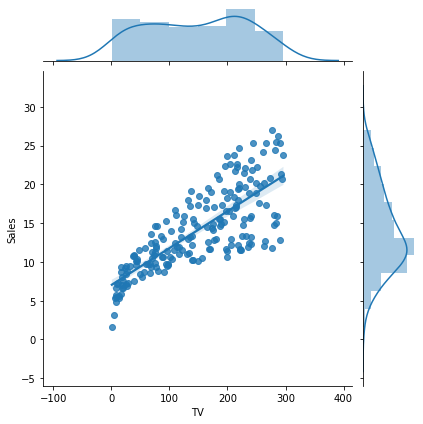

In [17]:
import seaborn as sns
sns.jointplot(x="TV",y="Sales",data=df,kind="reg")

In [21]:
from sklearn.linear_model import LinearRegression
# X=df[["TV"]]
# X.head()
# Y=df[["Sales"]]
# Y.head()

,TV
0,230.1
1,44.5
2,17.2
3,151.5
4,180.8


In [24]:
reg=LinearRegression()
model=reg.fit(X,Y)
# dir(model)

# B1 SABIT KATSAYI
model.intercept_ 
# B2,B3 VS..
model.coef_

array([[0.04753664]])

In [25]:
# rkare
model.score(X,Y)

0.611875050850071

(0.0, 28.27)

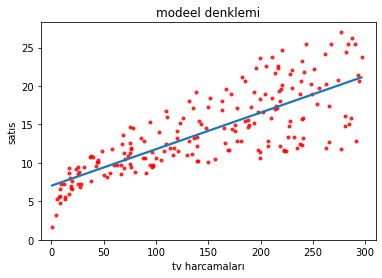

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt
# ci=none güven aralıkları koyma anlamında
g=sns.regplot(df["TV"],df["Sales"],ci=None,scatter_kws={'color':'r','s':9})
g.set_title("modeel denklemi")
g.set_ylabel("satıs")
g.set_xlabel("tv harcamaları")
plt.xlim(-10,310)
plt.ylim(bottom=0)

In [28]:
# y=ax+b de x yerine 165 konulunca predict edilen y değerini döndürür
model.predict([[165]]) 

array([[14.87613922]])

In [30]:
yeni_veri=[[5],[15],[30]]
model.predict(yeni_veri)

array([[7.27027675],
       [7.74564316],
       [8.45869276]])

In [50]:
gercek_y=Y[0:10]
# gercek_y
tahmin_edilen_y_array=model.predict(X)[0:10]
tahmin_edilen_y=pd.DataFrame(tahmin_edilen_y_array)
# tahmin_edilen_y
hatalar=pd.concat([gercek_y,tahmin_edilen_y],axis=1)
hatalar
# isimlendirme:
hatalar.columns=["gercek y","tahmin"]
hatalar


,gercek y,tahmin
0,22.1,17.970775
1,10.4,9.147974
2,9.3,7.850224
3,18.5,14.234395
4,12.9,15.627218
5,7.2,7.446162
6,11.8,9.765950
7,13.2,12.746498
8,4.8,7.441409
9,10.6,16.530414


In [52]:
hatalar["hata"]=hatalar["gercek y"]-hatalar["tahmin"]
hatalar

,gercek y,tahmin,hata
0,22.1,17.970775,4.129225
1,10.4,9.147974,1.252026
2,9.3,7.850224,1.449776
3,18.5,14.234395,4.265605
4,12.9,15.627218,-2.727218
5,7.2,7.446162,-0.246162
6,11.8,9.765950,2.034050
7,13.2,12.746498,0.453502
8,4.8,7.441409,-2.641409
9,10.6,16.530414,-5.930414


In [54]:
hatalar["hata_karaler"]=hatalar["hata"]**2
hatalar

,gercek y,tahmin,hata,hata_karaler
0,22.1,17.970775,4.129225,17.050503
1,10.4,9.147974,1.252026,1.567569
2,9.3,7.850224,1.449776,2.101851
3,18.5,14.234395,4.265605,18.195390
4,12.9,15.627218,-2.727218,7.437719
5,7.2,7.446162,-0.246162,0.060596
6,11.8,9.765950,2.034050,4.137358
7,13.2,12.746498,0.453502,0.205664
8,4.8,7.441409,-2.641409,6.977040
9,10.6,16.530414,-5.930414,35.169814


In [56]:
import numpy as np
np.mean(hatalar["hata_karaler"])

9.290350329638105